In [43]:
#import all packages 
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math
import copy

In [44]:
#initialize centroids with random numbers:
def init_centroids(centroids):
    for counter_centroids, row in enumerate(centroids):
        row[0]=random.uniform(0,10)
        row[1]=random.uniform(0,10)
        row[7]=counter_centroids+1 #should be numbered 1, 2, ... not 0, 1, ...


In [45]:
#load data
#create 3 clusters of randomly distributed points
#TODO load in data

def init_array(array):
    
    #create emty arrays of right size
    cluster_x = np.zeros((300,1))
    cluster_1_x =  np.zeros((100, 1))
    cluster_2_x =  np.zeros((100, 1))
    cluster_3_x =  np.zeros((100, 1))

    cluster_y = np.zeros((300,1))
    cluster_1_y =  np.zeros((100, 1))
    cluster_2_y =  np.zeros((100, 1))
    cluster_3_y =  np.zeros((100, 1))

    #fill array with randomly chosen x-/ y-values
    #points are choosen around perfekt centroid:
    # 1: (2, 2)
    # 2: (8, 2)
    # 3: (2, 8)
    
    for x in range(100):
        cluster_1_x[x] = random.uniform(1, 3)
        #cluster_1_x[x] = random.uniform(0, 10)
    for x in range(100):
        cluster_1_y[x] = random.uniform(1, 3)
        #cluster_1_y[x] = random.uniform(0, 10)
    
    for x in range(100):
        cluster_2_x[x] = random.uniform(7, 9)
    for x in range(100):
        cluster_2_y[x] = random.uniform(1, 3)
    
    for x in range(100):
        cluster_3_x[x] = random.uniform(1, 3)   
    for x in range(100):
        cluster_3_y[x] = random.uniform(7, 9)

    
    #concentrate cluster_1/ 2/ 3 into one array for x and y each
    cluster_x = np.concatenate((cluster_1_x, cluster_2_x), axis=0)
    cluster_x = np.concatenate((cluster_x, cluster_3_x), axis=0)

    cluster_y = np.concatenate((cluster_1_y, cluster_2_y), axis=0)
    cluster_y = np.concatenate((cluster_y, cluster_3_y), axis=0)


    #counter to go through x and y array
    x_counter=0
    y_counter=0


    #load 2D array with data
    for counter_load, row in enumerate(array):
        row[0]=cluster_x[x_counter]
        row[1]=cluster_y[y_counter]
        x_counter+=1
        y_counter+=1
    

In [46]:
#function which prints all points in their colour corresbonding to their closest centroid
#in first run through every point is printed in black
#function which prints all points in their colour corresbonding to their closest centroid
def plot_array():
    
    #label plot
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')
    
    #dictionairy for colours 
    dictionairy = {0 : 'black',
                   1 : 'darkblue', 
                   2 : 'darkorange', 
                   3 : 'darkgreen', 
                   4 : 'fuchsia', 
                   5 : 'aqua', 
                   6 : 'lime', 
                   7 : 'steelblue',
                   8 : 'brown', 
                   9 : 'darkgrey', 
                  10 : 'gold'}
    
    #draw points
    for counter, value in enumerate(array):
        wert = value[2]
        farbe = dictionairy[wert]
        plt.plot(value[0],value[1], marker = 'o', color = farbe, markersize=3)
       
    
    #draw centroids    
    for counter_centroids, row in enumerate(centroids):
        wert = row[7]
        farbe = dictionairy[wert]
        plt.plot(row[0],row[1], marker = 'x', color = farbe, markersize=5, markerfacecolor = 'k', markeredgewidth=1.5)
       

In [47]:
#measures distance between a data x-/ y-value and centroid x-/ y-value and returns distance
def distance_to_point(x, y, x_centroid, y_centroid):
    del_x = x-x_centroid 
    del_y = y-y_centroid
    del_x = -del_x if del_x<0 else del_x
    del_y = -del_y if del_y<0 else del_y
    distance = math.sqrt(del_x**2 + del_y**2)
    return distance

#measures distance between a x-/ y-value and centroid and returns distance
def measure_distance():
    
    #goes through each data point
    for counter_array, value in enumerate(array):
        #goes through each centroid
        for counter_centroids, row in enumerate(centroids):
            value[counter_centroids + 3] = distance_to_point(value[0], value[1], row[0], row[1])

In [48]:
#measure closest centroid and assigns to array
#closest centroid a=1, b=2, c=3
def closest_centroid():
    
    #deepcoopy of array
    array_copy = copy.deepcopy(array)
    #slicing array, so only distances are in new array
    #[for each column, from the third row to the end]
    array_copy = array_copy[:,3:]
    
    height, distance_count = array_copy.shape
    
    while distance_count != 0:
        
        for counter_array, row in enumerate(array_copy):
            if row[distance_count-1] == min(row) and min(row) != 0:
                array[counter_array, 2] = distance_count
        
        distance_count -= 1
            

In [49]:
#goes through the array and adds for each centroid the x-/ y-values and a counter 
#to keep track of the number of inputs it saves it into centroids array
def gather_values_from_array():
    for counter_array, value in enumerate(array):
        k = int(value[2]) - 1
        centroids[k,4] += 1
        centroids[k,5] += value[0]
        centroids[k,6] += value[1]
        
#the centroids are reassigned (new_x = score_x / counter)    
def reassign_centroid():

    gather_values_from_array()

    for counter_centroids, row in enumerate(centroids):
         
        #write old values into new spot
        row[2] = row[0]
        row[3] = row[1]
        
        #if there are points assigned to each centroid (counter != 0)
        #the centroids are reassigned (new_x = score_x / counter)
        if row[4] != 0:
            new_x = row[5] / row[4]
            new_y = row[6] / row[4]
            row[0] = new_x
            row[1] = new_y
        
        
        #resets values for the next reassign_centroid() / kmean runthrough
        row[4] = 0
        row[5] = 0
        row[6] = 0


In [50]:
#evaluate distance change of centroids
#by comparing centroids coordinates before and after reassign_centroids()
def evaluate_score():
    
    
    for counter_centroids, row in enumerate(centroids):
        
        #distance=old value-new value
        distance_x = row[2]-row[0]
        distance_y = row[3]-row[1]
        
        #absolute value  
        distance_x = -distance_x if distance_x<0 else distance_x
        distance_y = -distance_y if distance_y<0 else distance_y
        distance = math.sqrt(distance_x**2 + distance_y**2)
         
        #for less than 0.05%  it writes true in colum nr 8
        min_value = 0.0005
        if distance < min_value:
            row[8] = 1 # == true
        else: 
            row[8] =  0 # == false
    
    
    #if the complete row nr 8 is filled with 1
    #the sum of those must be cluster_guess
    summe = 0
    
    for counter_centroids, row in enumerate(centroids):
        summe += row[8]
    
            
    if summe == cluster_guess:
        return 1# == true
    else:
        return 0# == false

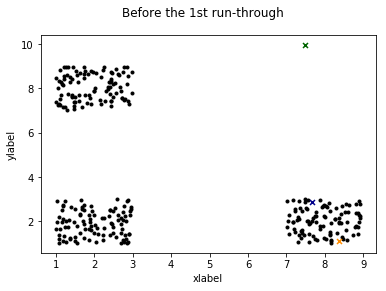

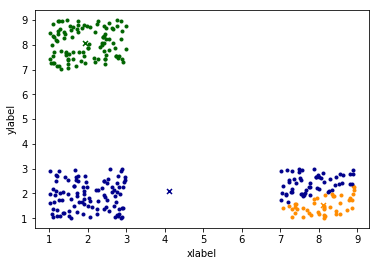

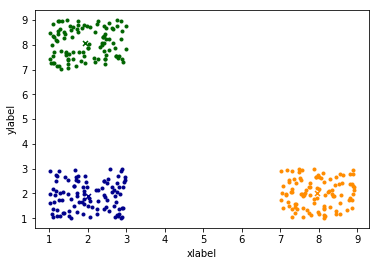

Programm stops after 2 runthroughs


In [51]:
#cluster guess maximum is 10
cluster_guess=3

#create array of data points
#style: cluster_guess + 3 dimension because: x-value, y-value, the closest centroid, distance to centroids, ....
array = np.zeros((300,cluster_guess + 3))
init_array(array)

#create array of centroids and initialize
#style:"cur_x", "cur_y", "old_x", "old_y", "counter", "score_x", "score_y", "number of centroid", "is changing koordinates?"
centroids = np.zeros((cluster_guess,9))
init_centroids(centroids)

#plot figure before 1st run-through
plt.figure()
plt.suptitle('Before the 1st run-through')
plot_array()
plt.show()

#variables for run-through
counter_runs = 1
runner = 1 #bool


while runner:
    measure_distance()
    closest_centroid()
    reassign_centroid()
       
    if evaluate_score():
        runner=0
        break
    else:
        plot_array()
        plt.show()
    counter_runs += 1
        
        

print("Programm stops after " + str(counter_runs-1) + " runthroughs")